In [1]:
import ephem
import numpy as n
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Tahoma", "DejaVu Sans",
                                   "Lucida Grande", "Verdana"]
import matplotlib as mpl
mpl.rcParams.update({"xtick.labelsize": 12, "ytick.labelsize":12, "font.size":12})

import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
import datetime as dt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/shibaji/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# def gps_to_ecef_pyproj(lat, lon, alt):
#     ecef = pyproj.Proj(proj='geocent', ellps='WGS84', datum='WGS84')
#     lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
#     x, y, z = pyproj.transform(lla, ecef, lon, lat, alt, radians=False)
#     return x, y, z

def convert(lats, lons, alts, to, frm):
    xyz = to.transform_points(frm, lons, lats, alts)
    return xyz

/home/shibaji/anaconda3/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/shibaji/anaconda3/lib/python3.7/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/shibaji/anaconda3/lib/python3.7/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/shibaji/anaconda3/lib/python3.7/site-p

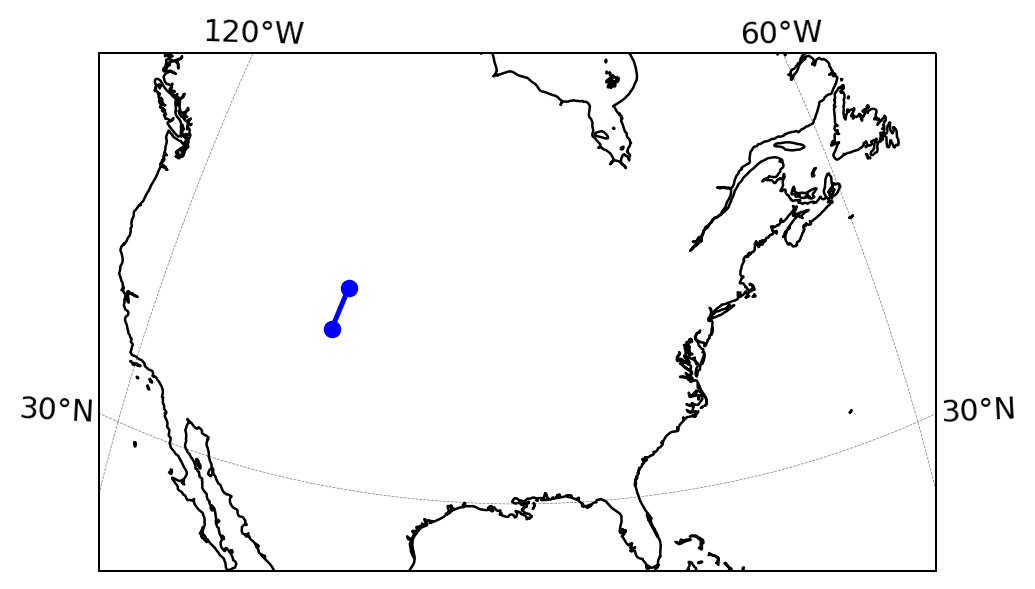

In [4]:
figsize = (6,6)
def draw_images(lats, lons, date, to=ccrs.Orthographic(-90, -90)):
    fig = plt.figure(dpi=180, figsize=figsize)
    ax = plt.axes(projection=to)
    ax.set_global()
    ax.add_feature(Nightshade(date, alpha=0.3))
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, 
        color='black', alpha=0.5, linestyle='--', draw_labels=True)
    gl.xlocator = mticker.FixedLocator(n.arange(-180,180,60))
    gl.ylocator = mticker.FixedLocator(n.arange(-90,90,30))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax, fig

date = dt.datetime(2017,8,21,18,26,40)
lats = np.linspace(0,90,num=90*2)
lons = np.linspace(-180,180,num=91*2)
to = ccrs.Orthographic(-90, 50)
ax, fig = draw_images(lats, lons, date, to)

ny_lon, ny_lat = -104.4522, 42.7625
delhi_lon, delhi_lat =  -105.2705, 40.015
ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),)
ax.set_extent([-120, -60, 25, 55], crs = ccrs.PlateCarree())

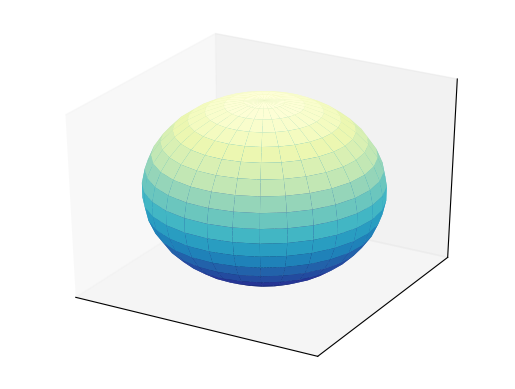

In [17]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.gca(projection='3d')
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()
